# Computational Biophysics Term Project


### Astitva(20CS30007)
### Saikat Moi(20CS10050)
### Rohit Kumar Prajapati(20CS30041)


"Generate Amino Acid Contact Matrix
consider 20 amino acid types and one 
solvent contacting residues in protein 
surfaces. The Amino Acid Contact (AAC)
 matrix is obtained from the statistical analysis 
of residue-pairing frequencies in 
one protein–protein complex database.
  select complexes from the Protein Data Bank. 
These complexes are made up of two or more
 protein subunits and their structures are 
determined by X-rays with cutoff values
 of resolution 2.2 Å and sequence identity 30%. 
define a pair of residues from two subunits as
 a contact pair, if two atoms (one from each subunit)
 are within distance d (set to be 6)."

In [51]:
# Read PDB IDs from a text file and store them in a list
def read_pdb_ids(file_path):
    with open(file_path, 'r') as file:
        pdb_ids = [line.strip() for line in file]
    return pdb_ids

file_path = "../../dataset/merged_file.txt"
pdb_id_list = read_pdb_ids(file_path)
print("List of PDB IDs:")
print(pdb_id_list)


List of PDB IDs:
['1NCE', '1H6R', '1IGZ', '2C2I', '1VJE', '1AV8', '1CWS', '1CH8', '1A6Z', '1DQR', '1GT4', '1GXJ', '1C6Y', '1GRB', '1C7S', '12E8', '1GTE', '1D4W', '1L98', '1LPK', '1FIA', '1FT3', '1GT3', '1FS3', '1HW4', '1FKO', '1B8M', '1BJW', '1GET', '1AIF', '1I0H', '1J9A', '1KH7', '1EVZ', '1AKC', '1IS2', '1JDX', '1K9D', '1MVP', '2AWD', '1F4X', '1A6W', '1L08', '1M1D', '1DM7', '1ISV', '2H8G', '1GML', '1BRS', '1N3Q', '2AWP', '1IDA', '1IDE', '1L8O', '1DLC', '1MX0', '1H1Z', '1IT3', '2SCP', '1P4K', '1LOL', '2V27', '1ERE', '2NQL', '1HW3', '1J7G', '1A43', '1A94', '1IDF', '1NHR', '1LZ0', '1HZI', '1B9F', '1NNW', '1JFG', '1N3U', '1FC4', '1I2C', '1GUP', '1GPA', '1KUI', '1D2Z', '1FC1', '1JNN', '1L11', '1IB2', '1AW1', '1DVP', '1KSC', '1CG3', '1ASD', '1H2H', '1BWP', '2C0T', '1AOF', '1DNA', '1EVH', '1BYE', '1EVU', '1LBM', '1C5F', '1EI5', '1EIB', '1G7W', '1UTX', '1E5Q', '1D1S', '1A7G', '1L4F', '1LL3', '1GBF', '1DMN', '1J98', '1BRB', '2OWP', '1B3A', '1EN4', '2C0R', '1F9P', '1N31', '1JLF', '1MAP', '1N52'

In [52]:
len(pdb_id_list)

4172

In [53]:
# Define a dictionary mapping amino acid residue names to indices
amino_acid_index_map = {
    'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLN': 5, 'GLU': 6, 'GLY': 7, 'HIS': 8,
    'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15, 'THR': 16,
    'TRP': 17, 'TYR': 18, 'VAL': 19, 'HOH': 20 
}


In [54]:
from Bio.PDB import *
import numpy as np

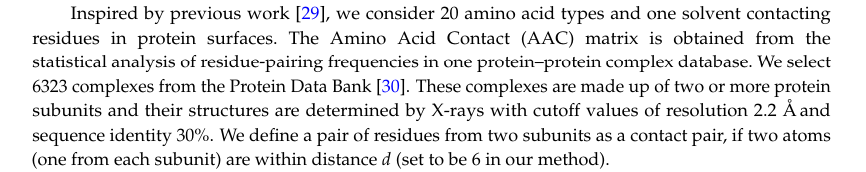

In [55]:
from IPython.display import Image
Image(filename='Screenshot (1142).png',width=800, height=400)

In [56]:
cutoff_distance = 6.0  # Angstroms

# Calculate distance between two atoms
def calculate_distance(coord1, coord2):
    return np.linalg.norm(coord1 - coord2)

# Check if two atoms are in contact
def are_atoms_in_contact(atom1, atom2):
    distance = calculate_distance(atom1.get_coord(), atom2.get_coord())
    return distance <= cutoff_distance

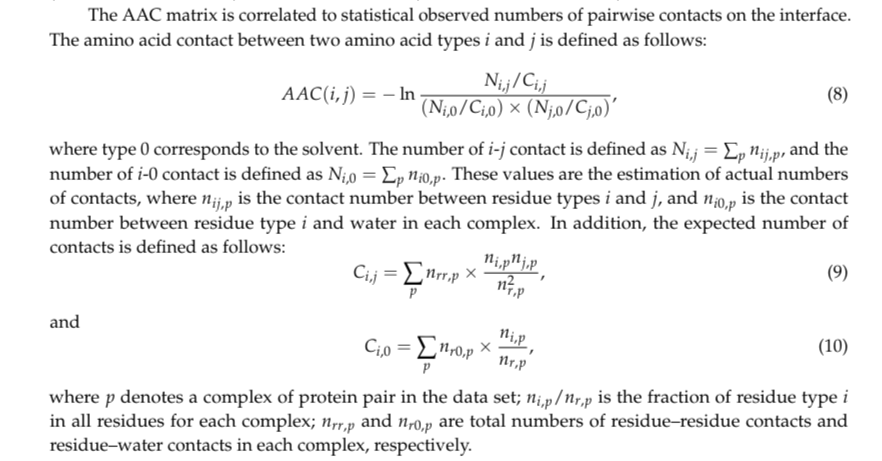

In [57]:
Image(filename='Screenshot (1141).png',width=800, height=200)

In [59]:
# Function to process a single complex and calculate contact pairs
def process_dimer(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('dimer', pdb_file)
    
    # Initialize contact matrix and residue counts
    contact_matrix = np.zeros((21, 21), dtype=int)  # 20 amino acids + solvent
    residue_counts = np.zeros(21, dtype=int)  # 20 amino acids + solvent
    residue_residue_contacts = 0
    residue_solvent_contacts = 0
    
    # Iterate over residues in the dimer
    for model in structure:
        for chain in model:
            residues = list(chain.get_residues())
            for i, residue1 in enumerate(residues):
                residue1_name = residue1.get_resname()
                residue_index1 = amino_acid_index_map.get(residue1_name, 20)
                residue_counts[residue_index1] += 1
                #print(residue1_name)
                for j, residue2 in enumerate(residues):
                    residue2_name = residue2.get_resname()
                    residue_index2 = amino_acid_index_map.get(residue2_name, 20)
                    # Check if any pair of atoms is in contact
                    if i<j: # Avoid self-interaction
                        for atom1 in residue1:
                            for atom2 in residue2:
                                if are_atoms_in_contact(atom1, atom2):
                                    # Increment the corresponding entry in the contact matrix
                                    contact_matrix[residue_index1][residue_index2] += 1
                                    contact_matrix[residue_index2][residue_index1] += 1
                                    if residue_index2 == 20:  # Check if the second residue is solvent
                                        residue_solvent_contacts += 1
                                    else:
                                        residue_residue_contacts += 1
                                    break  # No need to check other atoms
                # Increment residue counts
    
    # Calculate fraction of each residue type in the complex
    fraction_residue_complex = residue_counts / np.sum(residue_counts)

    
    # Calculate C(i,j) matrix for this complexes
    C_matrix_dimer = np.zeros((20, 20), dtype=float)
    for i in range(20):
        for j in range(20):
            C_matrix_dimer[i][j] = residue_residue_contacts * fraction_residue_complex[i] * fraction_residue_complex[j]
    
    # Calculate C(i,0) vector for this complexes
    C_vector_dimer = np.zeros(20, dtype=float)
    for i in range(20):
        C_vector_dimer[i] =  residue_solvent_contacts * fraction_residue_complex[i]
    
    return C_matrix_dimer, C_vector_dimer,contact_matrix

# Main function to process all complexes and compute C(i,j) and C(i,0)
def process_all_dimers(dimer_list):
    all_C_matrices = []
    all_C_vectors = []
    all_contact_matrices = []
    
    # Process all complexes
    for pdb_id in dimer_list:
        pdb_file = f"../../pdbfiles_all/{pdb_id}.pdb"
        C_matrix_dimer, C_vector_dimer,contact_matrix_dimer = process_dimer(pdb_file)
        all_C_matrices.append(C_matrix_dimer)
        all_C_vectors.append(C_vector_dimer)
        all_contact_matrices.append(contact_matrix_dimer)
    
    # Sum up C(i,j) matrices and C(i,0) vectors for all complexes
    C_matrix_sum = np.sum(all_C_matrices, axis=0)
    C_vector_sum = np.sum(all_C_vectors, axis=0)
    contact_matrix_sum= sum(all_contact_matrices)
    
    return C_matrix_sum, C_vector_sum,contact_matrix_sum

# Custom List of PDB IDs for complexes
pdb_id_list = pdb_id_list[0:10]

# Process all complexes and compute C(i,j) and C(i,0)
C_matrix, C_vector,matrix_contact = process_all_dimers(pdb_id_list)

In [61]:
# Function to compute AAC matrix
def compute_AAC_matrix(C_matrix, C_vector,matrix_contact):
    # Calculate AAC matrix
   AAC_matrix = np.zeros((20, 20), dtype=float)
   for i in range(20):
    for j in range(20):
       if C_matrix[i][j] != 0 and matrix_contact[i][20] != 0 and matrix_contact[j][20] != 0 and C_vector[i] != 0 and C_vector[j] != 0:
         AAC_matrix[i][j] = -np.log((matrix_contact[i][j]/C_matrix[i][j]) / ((matrix_contact[i][20]/C_vector[i])*(matrix_contact[j][20]/C_vector[j])))
       else:
         AAC_matrix[i][j] = 0
        
        
   return AAC_matrix

#Compute AAC matrix
AAC_matrix = compute_AAC_matrix(C_matrix, C_vector,matrix_contact)

In [62]:
print("AAC Matrix:")


print("   ",end=' ')
for i, row in enumerate(AAC_matrix):
    print(list(amino_acid_index_map.keys())[i], end='  ')
print()

for i, row in enumerate(AAC_matrix):
    print(list(amino_acid_index_map.keys())[i], end=' ')
    for value in row:
        print(f'{value:.2f}', end=' ')
    print()

AAC Matrix:
    ALA  ARG  ASN  ASP  CYS  GLN  GLU  GLY  HIS  ILE  LEU  LYS  MET  PHE  PRO  SER  THR  TRP  TYR  VAL  
ALA -1.29 -0.44 -0.16 -0.32 -1.26 -0.30 -0.26 -0.77 -0.46 -0.91 -1.24 -0.43 -1.46 -0.96 -0.45 -0.33 -0.55 -0.67 -0.65 -1.07 
ARG -0.44 0.69 0.39 0.25 -0.24 0.39 0.19 0.06 0.23 -0.19 -0.13 0.63 -0.25 0.14 0.39 0.34 0.16 0.25 0.17 -0.11 
ASN -0.16 0.39 0.19 0.13 -0.61 0.01 0.42 -0.40 0.01 -0.60 -0.33 0.30 -0.47 -0.29 -0.07 -0.23 -0.18 0.45 -0.28 -0.46 
ASP -0.32 0.25 0.13 0.76 -0.38 0.25 0.54 -0.46 -0.02 -0.15 -0.29 -0.09 -0.53 -0.16 0.20 -0.07 0.14 0.20 0.03 -0.26 
CYS -1.26 -0.24 -0.61 -0.38 -2.79 -0.68 -0.18 -0.91 -0.68 -0.98 -1.60 -0.63 -1.43 -1.26 -0.89 -0.53 -0.76 -0.61 -1.51 -1.51 
GLN -0.30 0.39 0.01 0.25 -0.68 -0.10 0.46 -0.15 0.22 -0.04 -0.40 0.11 -0.50 -0.15 0.20 0.11 -0.03 0.19 -0.35 -0.29 
GLU -0.26 0.19 0.42 0.54 -0.18 0.46 0.56 -0.18 0.37 -0.15 -0.26 -0.11 -0.66 -0.03 0.28 0.16 0.16 0.22 0.30 -0.20 
GLY -0.77 0.06 -0.40 -0.46 -0.91 -0.15 -0.18 -0.61 -0.18 -0